# Exploring Nairobi Neighbourhoods

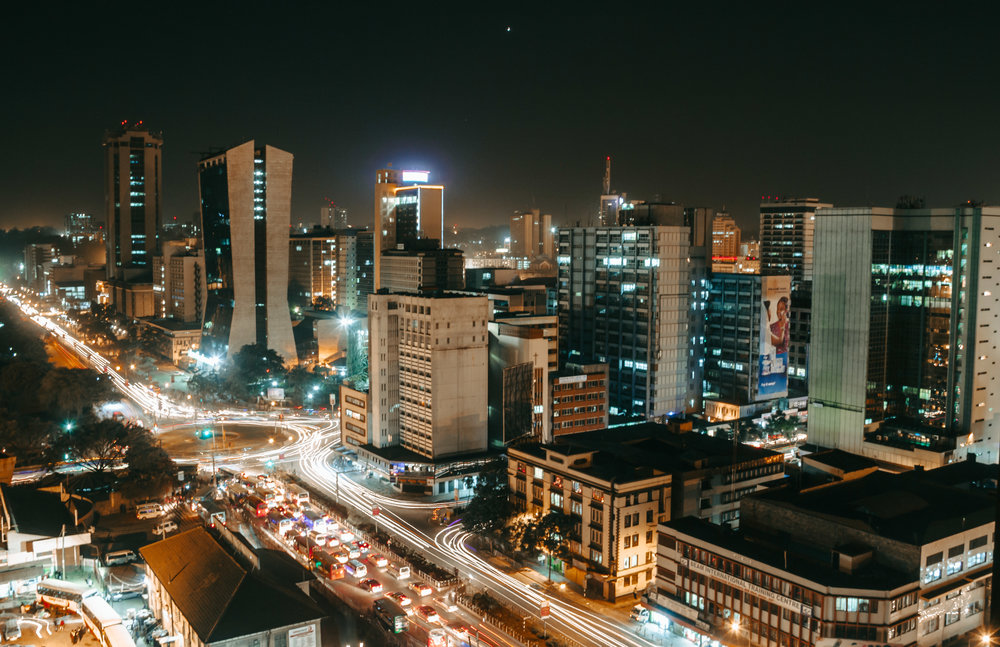

 Image courtesy of  [The African Perspective](https://www.tapmagonline.com/tap/nairobi-night-life)

In [537]:
#!pip install tabula-py
#!pip install geopy
#!pip install folium
#!pip install tabulate
#!pip install -U scikit-learn

In [538]:
import tabula
from tabula import read_pdf
from tabulate import tabulate
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [539]:
df= tabula.read_pdf("https://www.hassconsult.com/_files/ugd/2b71ec_157e19a7330b47fba997a9c41900d979.pdf", pages='3',multiple_tables=True)

Got stderr: May 12, 2023 10:54:20 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile
May 12, 2023 10:54:28 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile



In [563]:
Suburbs=pd.DataFrame(df[0])
Satelites=pd.DataFrame(df[1])

In [564]:
Suburbs.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3'],axis=1,inplace=True)
Suburbs.columns=['NairobiSuburbsLandIndex', 'Quarter%Change', 'Annual%Change', '10YearChangeFromApr2012', 
                 'AverageValuePerAcre(KShs)', '25Percentile', '75Percentile']

In [565]:
Satelites.iloc[1,0] = 'AthiRiver 4.4 %'
Satelites.iloc[9,0] = 'OngataRongai -2.2 %'
Satelites.drop(0, inplace=True)
Satelites.reset_index(drop=True, inplace=True)
Satelites.columns=['NairobiSatelitesLandIndex', 'Annual%Change', '10YearChangeFromApr2012', 'AverageValuePerAcre(KShs)', '25Percentile', '75Percentile']      
Satelites[['NairobiSatelitesLandIndex','Quarter%Change']] = Satelites['NairobiSatelitesLandIndex'].str.split(" ", 1, expand=True)
cols = ['NairobiSatelitesLandIndex', 'Quarter%Change', 'Annual%Change', '10YearChangeFromApr2012', 'AverageValuePerAcre(KShs)', '25Percentile', '75Percentile']
Satelites = Satelites[cols]

C:\Users\Rachael\AppData\Local\Temp\ipykernel_13724\1597421806.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  Satelites[['NairobiSatelitesLandIndex','Quarter%Change']] = Satelites['NairobiSatelitesLandIndex'].str.split(" ", 1, expand=True)


In [566]:
Satelites.iloc[0,0] = 'Athi River'
Satelites.iloc[8,0] = 'Ongata Rongai'

In [567]:
Suburbs.insert(0, 'Country', 'KENYA')
Satelites.insert(0, 'Country', 'KENYA')
Suburbs['Query']=Suburbs['NairobiSuburbsLandIndex']+","+Suburbs['Country']
Satelites['Query']=Satelites['NairobiSatelitesLandIndex']+","+Satelites['Country']

In [568]:
Suburbs['Area_Latitude']=""
Suburbs['Area_Longitude']=""
geolocator=Nominatim(user_agent="Nairobi_Areas")
for i in Suburbs.index:
    try:
        location=geolocator.geocode(Suburbs['Query'][i])
        Suburbs.loc[i,'Area_Latitude'] = location.latitude
        Suburbs.loc[i,'Area_Longitude'] = location.longitude
    except:
        Suburbs.loc[i,'Area_Latitude'] = ""
        Suburbs.loc[i,'Area_Longitude'] = ""
Suburbs  

,Country,NairobiSuburbsLandIndex,Quarter%Change,Annual%Change,10YearChangeFromApr2012,AverageValuePerAcre(KShs),25Percentile,75Percentile,Query,Area_Latitude,Area_Longitude
0,KENYA,Donholm,1.6 %,5.6 %,2.40 FOLD,"73,700,000","59,200,000","82,500,000","Donholm,KENYA",-1.300677,36.890328
1,KENYA,Gigiri,1.3 %,2.1 %,2.15 FOLD,"235,200,000","160,000,000","300,000,000","Gigiri,KENYA",-1.232503,36.807295
2,KENYA,Karen,0.1 %,0.4 %,1.85 FOLD,"65,400,000","58,000,000","70,000,000","Karen,KENYA",-1.328375,36.704968
3,KENYA,Kileleshwa,-0.8 %,-1.5 %,1.87 FOLD,"298,000,000","250,000,000","333,300,000","Kileleshwa,KENYA",-1.272327,36.799688
4,KENYA,Kilimani,-1.0 %,-2.4%,1.73 FOLD,"399,700,000","357,100,000","441,200,000","Kilimani,KENYA",-1.287442,36.784523
5,KENYA,Kitisuru,-0.7 %,1.4 %,1.89 FOLD,"95,000,000","74,100,000","110,000,000","Kitisuru,KENYA",-1.240379,36.77103
6,KENYA,Langata,2.8 %,7.0 %,2.13 FOLD,"72,300,000","57,000,000","75,000,000","Langata,KENYA",-1.332894,36.781666
7,KENYA,Lavington,0.2 %,0.2 %,1.71 FOLD,"232,000,000","186,700,000","266,700,000","Lavington,KENYA",-1.269584,36.773716
8,KENYA,Loresho,3.2 %,11.9 %,2.70 FOLD,"95,500,000","71,900,000","113,600,000","Loresho,KENYA",-1.260803,36.74527
9,KENYA,Muthaiga,-0.5 %,7.4 %,2.32 FOLD,"206,000,000","170,000,000","235,300,000","Muthaiga,KENYA",-1.253091,36.830104


In [569]:
Satelites['Area_Latitude']=""
Satelites['Area_Longitude']=""
geolocator=Nominatim(user_agent="Nairobi_Areas_Satelites")
for i in Satelites.index:
    try:
        location=geolocator.geocode(Satelites['Query'][i])
        Satelites.loc[i,'Area_Latitude'] = location.latitude
        Satelites.loc[i,'Area_Longitude'] = location.longitude
    except:
        Satelites.loc[i,'Area_Latitude'] = ""
        Satelites.loc[i,'Area_Longitude'] = ""
Satelites 

,Country,NairobiSatelitesLandIndex,Quarter%Change,Annual%Change,10YearChangeFromApr2012,AverageValuePerAcre(KShs),25Percentile,75Percentile,Query,Area_Latitude,Area_Longitude
0,KENYA,Athi River,4.4 %,7.1 %,2.59 FOLD,"16,900,000","6,000,000","22,400,000","Athi River,KENYA",-1.448115,36.971587
1,KENYA,Juja,-0.6 %,12.0 %,3.63 FOLD,"18,700,000","7,200,000","25,600,000","Juja,KENYA",-1.101523,37.015876
2,KENYA,Kiambu,-2.2 %,11.3 %,2.26 FOLD,"43,700,000","23,800,000","56,000,000","Kiambu,KENYA",-1.032077,36.815687
3,KENYA,Kiserian,-1.1 %,8.4 %,2.33 FOLD,"9,900,000","4,400,000","14,400,000","Kiserian,KENYA",-1.430349,36.686756
4,KENYA,Kitengela,1.3 %,10.9 %,2.80 FOLD,"14,600,000","8,500,000","18,400,000","Kitengela,KENYA",-1.474564,36.95907
5,KENYA,Limuru,4.2 %,-3.0 %,2.08 FOLD,"22,200,000","12,000,000","31,700,000","Limuru,KENYA",-1.115865,36.63931
6,KENYA,Mlolongo,3.0 %,8.6 %,1.66 FOLD,"34,100,000","13,600,000","50,000,000","Mlolongo,KENYA",-1.394651,36.943359
7,KENYA,Ngong,4.7 %,14.0%,2.69 FOLD,"28,800,000","18,000,000","40,000,000","Ngong,KENYA",-1.3666,36.65
8,KENYA,Ongata Rongai,-2.2 %,1.6 %,1.89 FOLD,"25,400,000","10,000,000","32,000,000","Ongata Rongai,KENYA",-1.395968,36.752011
9,KENYA,Ruaka,1.6 %,10.5 %,2.21 FOLD,"98,400,000","64,000,000","136,000,000","Ruaka,KENYA",-1.205646,36.784457


In [570]:
latitude = -1.272327
longitude = 36.799688
map_kileleshwa = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for NairobiSuburbs, lat, lng in zip(Suburbs['NairobiSuburbsLandIndex'],Suburbs['Area_Latitude'], Suburbs['Area_Longitude']):
    label = '{}'.format(NairobiSuburbs)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 6,
    popup = label,
    color = 'blue',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 1,
    parse_html=False).add_to(map_kileleshwa)
    
for NairobiSatelites, lat, lng in zip(Satelites['NairobiSatelitesLandIndex'], Satelites['Area_Latitude'], Satelites['Area_Longitude']):
    label = '{}'.format(NairobiSatelites)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 6,
    popup = label,
    color = 'red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1,
    parse_html=False).add_to(map_kileleshwa)    
map_kileleshwa

# Using Foursquare

In [548]:
#CLIENT_ID = 'WEZVSUCWQRO3IB4IGR0CUUM35EYKLHWY2MHIYVRQYP30HHUA' 
#CLIENT_SECRET = 'RNLCTDBWRTBTHHVSZUTPOUEZM5UDLCUQFKYZCIMZS0OLLLWY'

In [571]:
CLIENT_ID = 'LVNSPMLTBBDPN2INEYVDDVFWLONMFATTHN1UXOKODIXDTMZA' 
CLIENT_SECRET = 'UU3FWAT2QOHGJHGYAGR54F5GFB4NJZFNDITCJZUTFCNW2OYI' 
VERSION = 20220901

In [572]:
def getNearbyVenues(names, latitudes, longitudes, radius = 1000):
    radius = 1000
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION,
            lat, 
            lng,         
            radius, 
            LIMIT)
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
                
    return (nearby_venues)   

In [585]:
Suburb_Venues= getNearbyVenues(names = Suburbs['NairobiSuburbsLandIndex'],
                              latitudes = Suburbs['Area_Latitude'],
                            longitudes = Suburbs['Area_Longitude'])
#Suburb_Venues

Donholm
Gigiri
Karen
Kileleshwa
Kilimani
Kitisuru
Langata
Lavington
Loresho
Muthaiga
Nyari
Parklands
Ridgeways
Riverside
Runda
Spring Valley
Upperhill
Westlands


In [584]:
Satelites_Venues= getNearbyVenues(names = Satelites['NairobiSatelitesLandIndex'],
                              latitudes = Satelites['Area_Latitude'],
                            longitudes = Satelites['Area_Longitude'])
#Satelites_Venues

Athi River
Juja
Kiambu
Kiserian
Kitengela
Limuru
Mlolongo
Ngong
Ongata Rongai
Ruaka
Ruiru
Syokimau
Thika
Tigoni


In [601]:
Suburb_Venues_restaurants = pd.DataFrame(Suburb_Venues[Suburb_Venues['Venue_Category'].str.contains('Restaurant')].reset_index(drop=True))
Suburb_Venues_restaurants.index = np.arange(1, len(Suburb_Venues_restaurants)+1)
Satelites_Venues_restaurants = pd.DataFrame(Satelites_Venues[Satelites_Venues['Venue_Category'].str.contains('Restaurant')].reset_index(drop=True))
Satelites_Venues_restaurants.index = np.arange(1, len(Satelites_Venues_restaurants)+1)

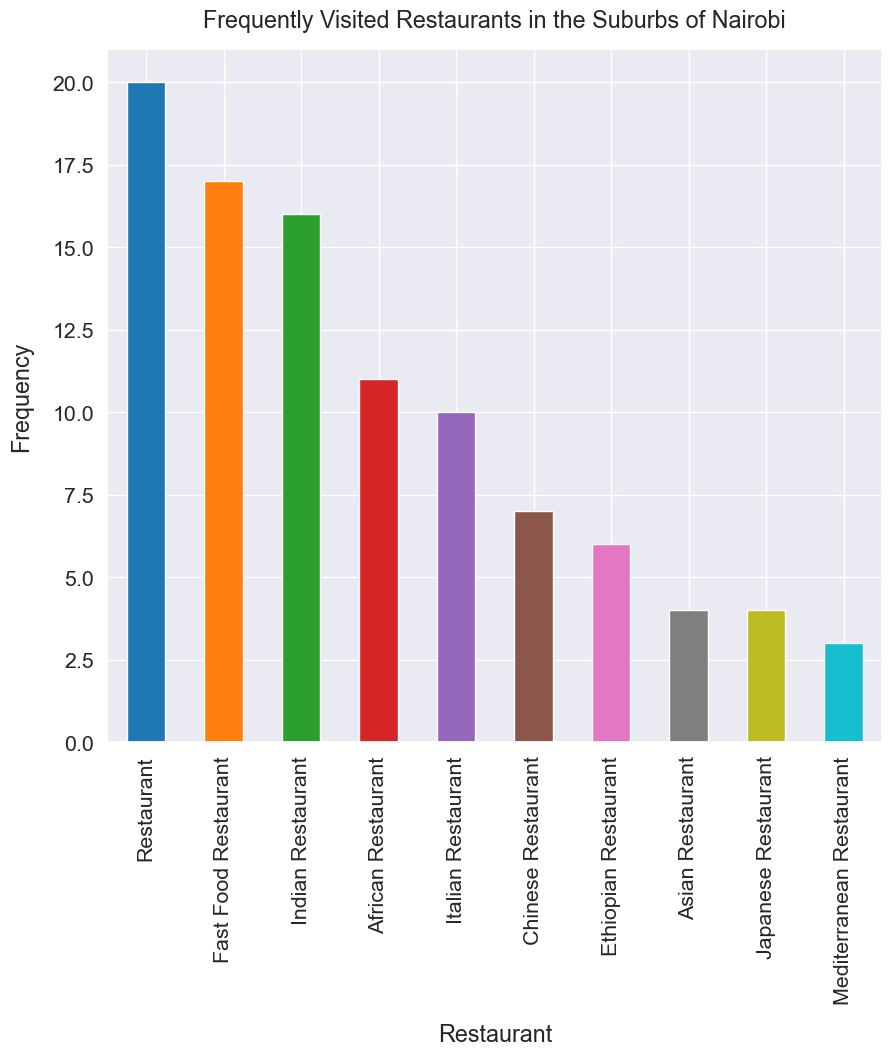

In [554]:
sns.set(font_scale=1.4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Suburb_Venues_restaurants['Venue_Category'].value_counts().head(10).plot(kind='bar', figsize=(10, 9), rot=0, color=colors)
plt.xlabel("Restaurant", labelpad=14)
plt.xticks(rotation=90)
plt.ylabel("Frequency", labelpad=14)
plt.title("Frequently Visited Restaurants in the Suburbs of Nairobi", y=1.02);


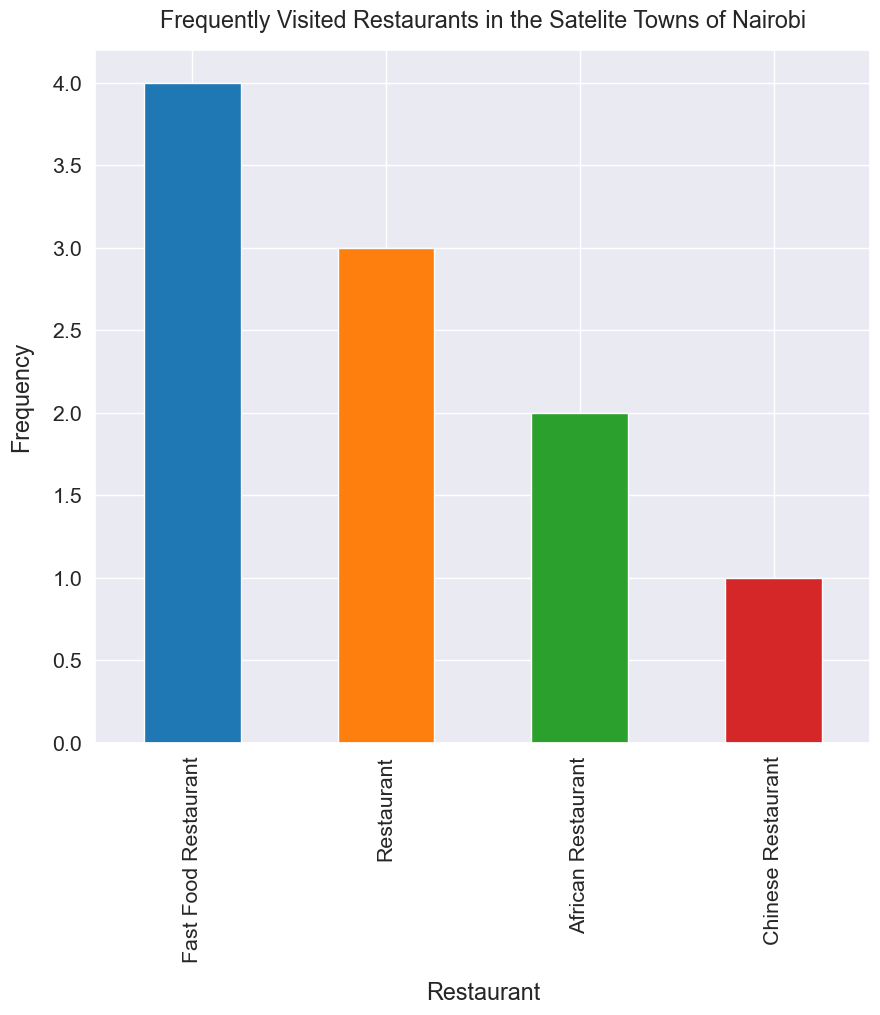

In [555]:
sns.set(font_scale=1.4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Satelites_Venues_restaurants['Venue_Category'].value_counts().head(10).plot(kind='bar', figsize=(10, 9), rot=0, color=colors)
plt.xlabel("Restaurant", labelpad=14)
plt.xticks(rotation=90)
plt.ylabel("Frequency", labelpad=14)
plt.title("Frequently Visited Restaurants in the Satelite Towns of Nairobi", y=1.02);

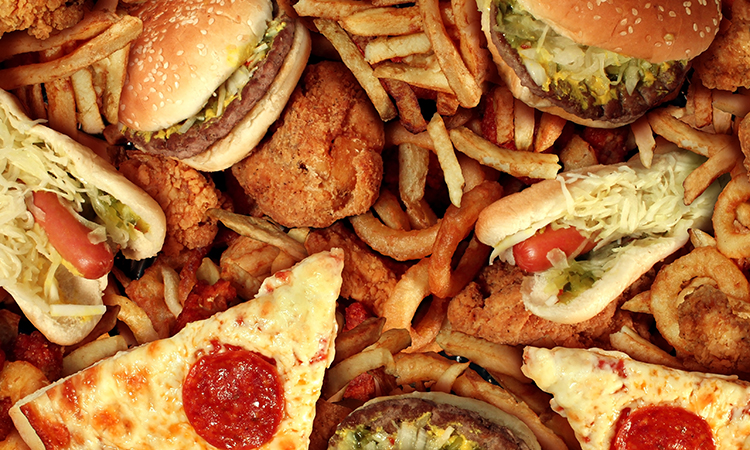

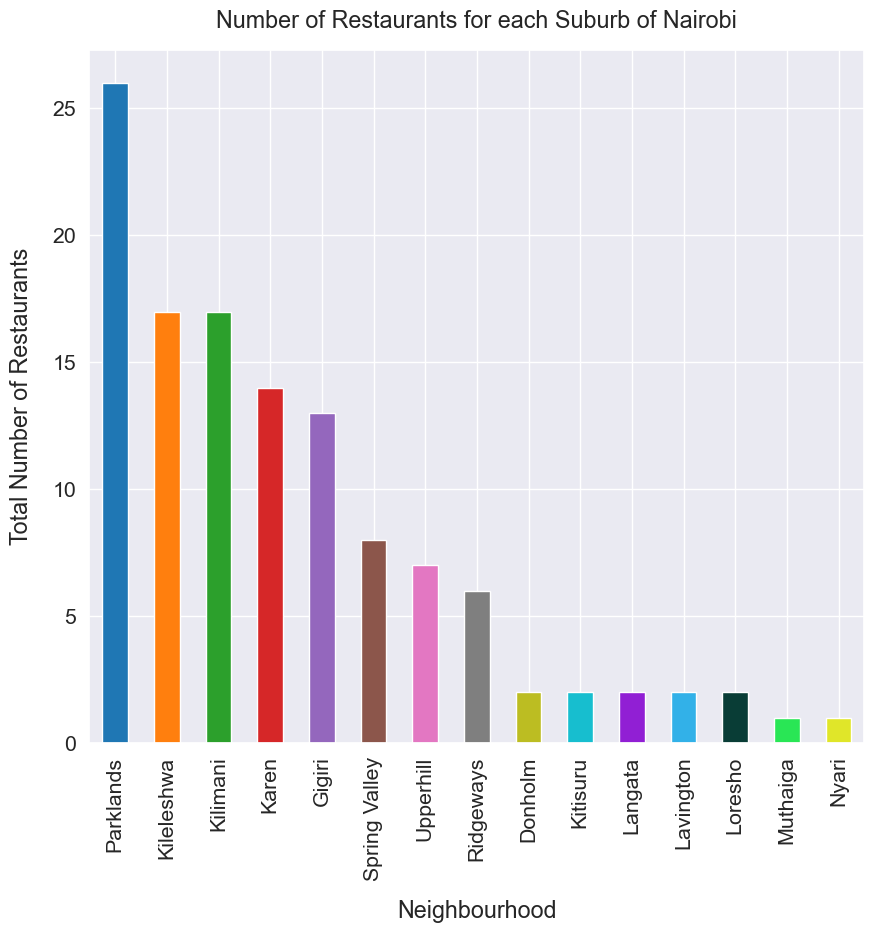

In [556]:
sns.set(font_scale=1.4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
          '#17becf','#911FD4','#32B1E8','#093D36', '#29E655','#E0E629','#E66829']
Suburb_Venues_restaurants['Neighborhood'].value_counts().plot(kind='bar', figsize=(10, 9), rot=0, color=colors)
plt.xlabel("Neighbourhood", labelpad=14)
plt.xticks(rotation=90)
plt.ylabel("Total Number of Restaurants", labelpad=14)
plt.title("Number of Restaurants for each Suburb of Nairobi", y=1.02);

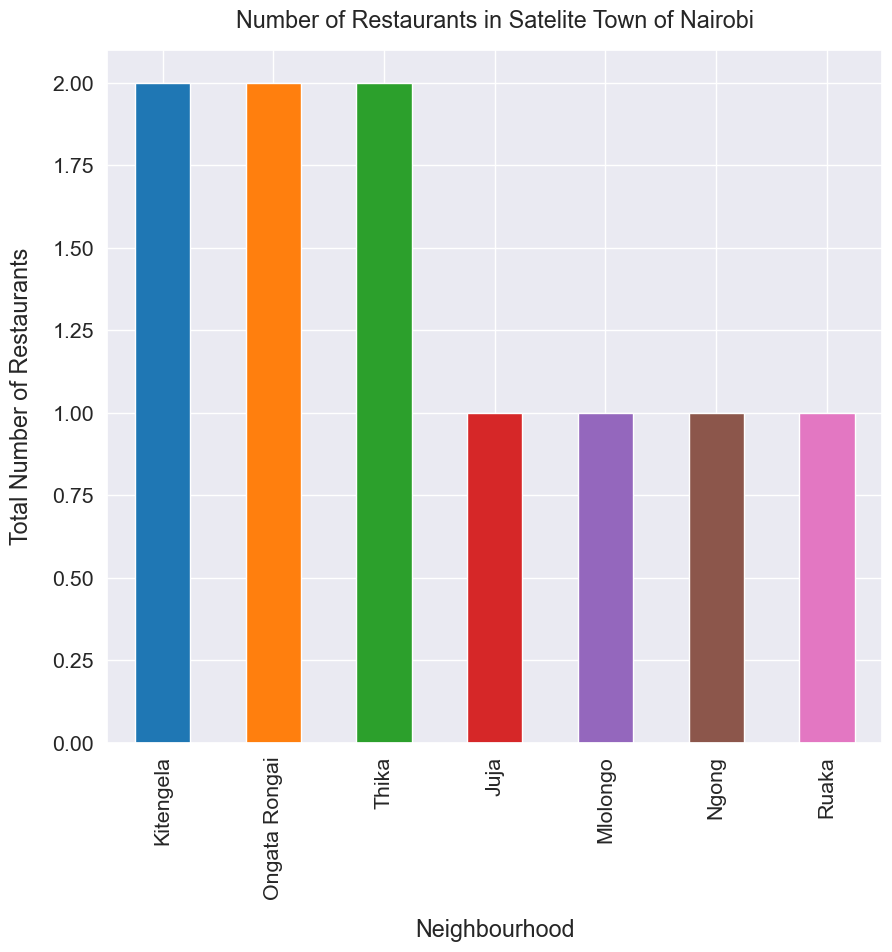

In [557]:
sns.set(font_scale=1.4)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Satelites_Venues_restaurants['Neighborhood'].value_counts().plot(kind='bar', figsize=(10, 9), rot=0, color=colors)
plt.xlabel("Neighbourhood", labelpad=14)
plt.xticks(rotation=90)
plt.ylabel("Total Number of Restaurants", labelpad=14)
plt.title("Number of Restaurants in Satelite Town of Nairobi", y=1.02);

In [558]:
#latitude = -1.272327
#longitude = 36.799688
neighborhood_locations = Suburb_Venues_restaurants[["Neighborhood_Latitude", "Neighborhood_Longitude", "Neighborhood"]]
mapsubres = folium.Map(location=[Suburb_Venues_restaurants.Neighborhood_Latitude.mean(), Suburb_Venues_restaurants.Neighborhood_Longitude.mean()], control_scale=True, zoom_start=12)
# add markers to map
for Suburb_Venues_restaurants, lat, lng in zip(Suburb_Venues_restaurants['Venue'],Suburb_Venues_restaurants['Venue_Latitude'], Suburb_Venues_restaurants['Venue_Longitude']):
    label = '{}'.format(Suburb_Venues_restaurants)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 4,
    popup = label,
    color = 'red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1,
    parse_html=False).add_to(mapsubres)  
    
for NairobiSuburbs, lat, lng in zip(Suburbs['NairobiSuburbsLandIndex'],Suburbs['Area_Latitude'], Suburbs['Area_Longitude']):
    label = '{}'.format(NairobiSuburbs)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
    [lat, lng],
    popup = Suburbs['NairobiSuburbsLandIndex']).add_to(mapsubres)        
mapsubres

In [559]:
Suburbs['10YearChangeFromApr2012Fold']=Suburbs['10YearChangeFromApr2012'].str.split().str[0]
Satelites['10YearChangeFromApr2012Fold']=Satelites['10YearChangeFromApr2012'].str.split().str[0]

In [560]:
maplandchange = folium.Map(location=[Suburbs.Area_Latitude.median(), Suburbs.Area_Longitude.median()], control_scale=True, zoom_start=12)

for i in range(0,len(Suburbs)):
   folium.CircleMarker(
      location=[Suburbs.iloc[i]['Area_Latitude'], Suburbs.iloc[i]['Area_Longitude']],
      popup=Suburbs.iloc[i]['NairobiSuburbsLandIndex'],
      radius=float(Suburbs.iloc[i]['10YearChangeFromApr2012Fold'])*12,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(maplandchange)

folium.map.Marker([Suburbs.iloc[i]['Area_Latitude'], Suburbs.iloc[i]['Area_Longitude']],
        icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue">{Suburbs.iloc[i]['10YearChangeFromApr2012Fold']}</div>""",  
                   icon_size=(10 ,10),
                    icon_anchor=(15,15),
                      )
                     ).add_to(maplandchange)
maplandchange

In [561]:
maplandchange2 = folium.Map(location=[Satelites.Area_Latitude.median(), Satelites.Area_Longitude.median()], control_scale=True, zoom_start=10)

for i in range(0,len(Satelites)):
   folium.CircleMarker(
      location=[Satelites.iloc[i]['Area_Latitude'], Satelites.iloc[i]['Area_Longitude']],
      popup=Satelites.iloc[i]['NairobiSatelitesLandIndex'],
      radius=float(Satelites.iloc[i]['10YearChangeFromApr2012Fold'])*12,
      color='green',
      fill=True,
      fill_color='crimson'
   ).add_to(maplandchange2)
folium.map.Marker([Satelites.iloc[i]['Area_Latitude'], Satelites.iloc[i]['Area_Longitude']],
        icon=folium.DivIcon( icon_size=(10 ,10),
        icon_anchor=(15,15),
        html=f"""<div style="font-family: sans serif; color: blue">{Satelites.iloc[i]['10YearChangeFromApr2012']}</div>""")
        ).add_to(maplandchange2)
maplandchange2